E-waste is a treasure trove of precious metals. Did you know that your old electronics could be worth their weight in gold, literally? In this notebook, we'll dive into the precious metal content in e-waste and see what insights we can uncover. If you find this notebook useful, please upvote it.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load datasets
file_path1 = 'e_waste_dataset_with_profit.csv'
file_path2 = 'e_waste_dataset (1).csv'
file_path3 = 'updated_e_waste_dataset.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)

### Initial Exploration

In [4]:
# Display the first few rows of each dataset
df1.head(), df2.head(), df3.head()

(              Item Category  Gold  Silver  Platinum  Rhodium  Nickel   Tin  \
 0        iPhone 11     Cat3  3.58    2.95      1.73     8.92    1.91  1.01   
 1          Toaster     Cat2  7.21    4.31      6.21     5.63    9.59  7.65   
 2          Speaker     Cat4  8.91    5.09      2.42     7.70    1.09  1.49   
 3   Microwave Oven     Cat2  2.62    3.84      2.98     7.66    9.41  2.25   
 4  Air Conditioner     Cat1  3.47    3.89      6.20     4.35    5.07  8.65   
 
    Lithium  Aluminum  Carbon  Profit ($)  
 0     1.82      1.27    9.51      270.34  
 1     0.51      3.03    4.22      689.75  
 2     7.42      3.63    8.83      570.43  
 3     7.84      6.18    6.36      290.78  
 4     8.62      0.82    5.53      505.16  ,
               Item  Gold (g)  Aluminum (g)  Silver (g)  Carbon (g)  \
 0    OnePlus 9 Pro      0.43          1.01        0.84        0.61   
 1  Nintendo Switch      1.92          1.52        2.71        0.74   
 2  HP Spectre x360      1.42          1.29   

### Data Cleaning and Preparation

In [5]:
# Check for missing values
df1.isnull().sum(), df2.isnull().sum(), df3.isnull().sum()

(Item          0
 Category      0
 Gold          0
 Silver        0
 Platinum      0
 Rhodium       0
 Nickel        0
 Tin           0
 Lithium       0
 Aluminum      0
 Carbon        0
 Profit ($)    0
 dtype: int64,
 Item            0
 Gold (g)        0
 Aluminum (g)    0
 Silver (g)      0
 Carbon (g)      0
 Platinum (g)    0
 Rhodium (g)     0
 Nickel (g)      0
 Tin (g)         0
 Lithium (g)     0
 dtype: int64,
 Item Name                  0
 Category                   0
 Brand Name                 0
 Device Age                 0
 Device Condition           0
 Material Recovery Rate     0
 Device Type                0
 Year of Manufacture        0
 Market Value of Metals     0
 Cost of Recovery           0
 Profit                     0
 Gold (g)                   0
 Aluminum (g)               0
 Silver (g)                 0
 Carbon (g)                 0
 Platinum (g)               0
 Rhodium (g)                0
 Nickel (g)                 0
 Tin (g)                    0
 Lithi

In [6]:
# Drop rows with missing values
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

### Correlation Analysis

In [7]:
# Select only numeric columns for correlation heatmap
numeric_df1 = df1.select_dtypes(include=[np.number])
numeric_df3 = df3.select_dtypes(include=[np.number])

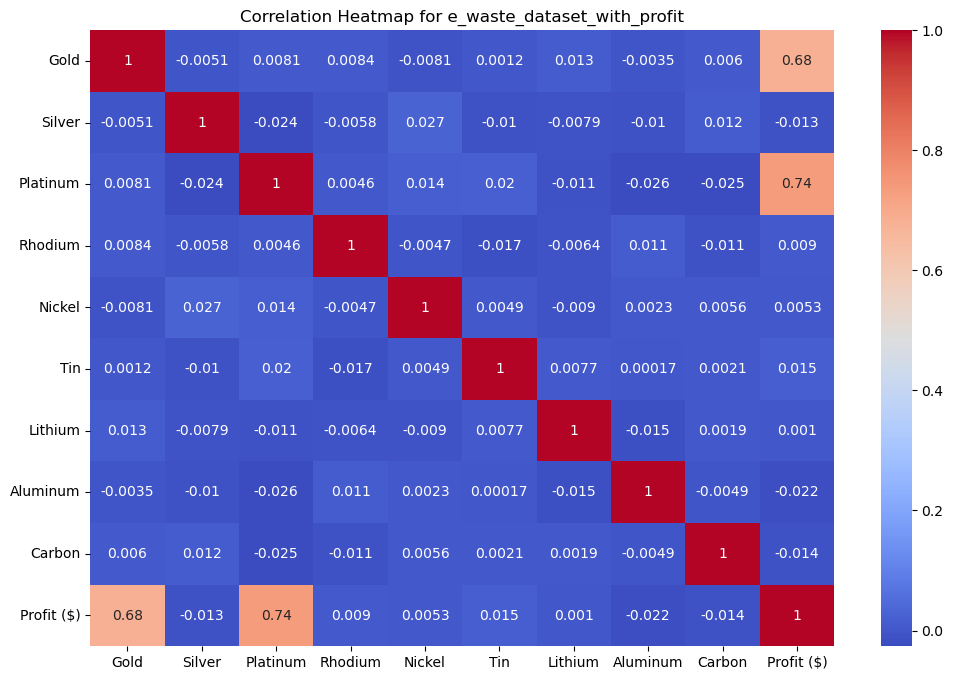

In [8]:
# Plot correlation heatmap for df1
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for e_waste_dataset_with_profit')
plt.show()

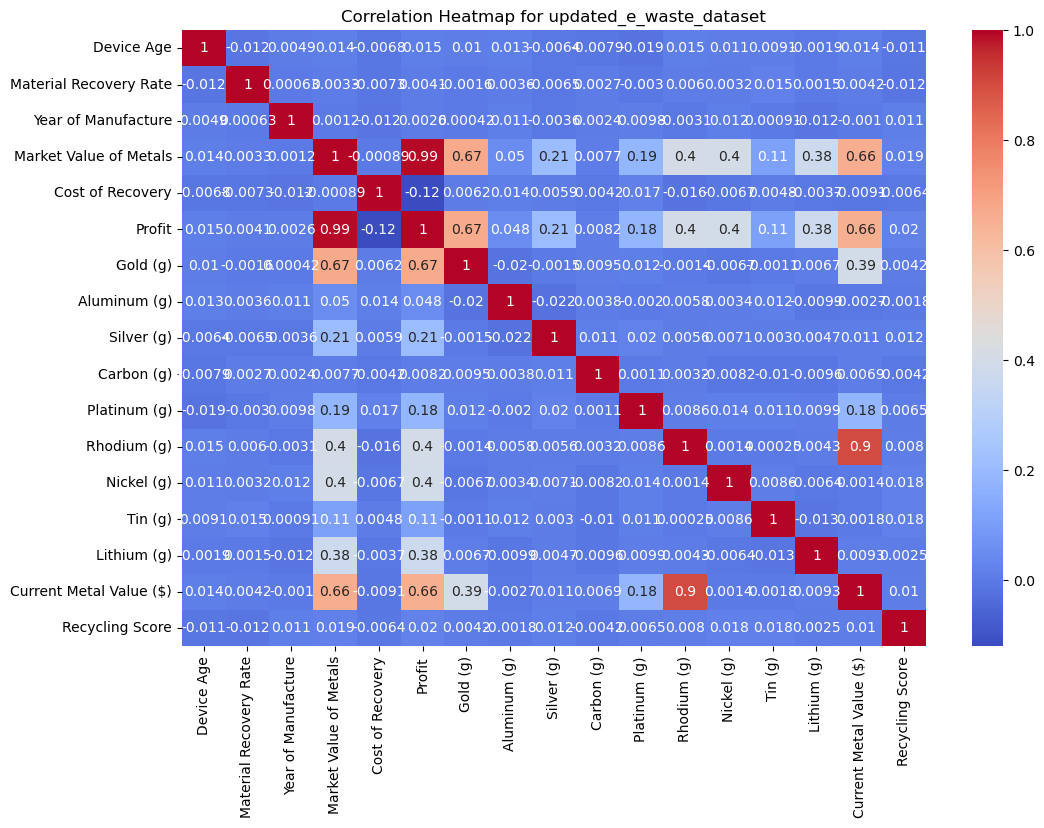

In [9]:
# Plot correlation heatmap for df3
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df3.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for updated_e_waste_dataset')
plt.show()

### Predicting Profit from Metal Content

In [10]:
# Define features and target variable
X = numeric_df1.drop(columns=['Profit ($)'])
y = numeric_df1['Profit ($)']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(8.388869767444517e-06, 0.9999999998134541)

In [18]:
import requests
import os

coco_names_url = "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

if not os.path.exists("coco.names"):
    response = requests.get(coco_names_url)
    with open("coco.names", "wb") as f:
        f.write(response.content)


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import cv2
import pickle

# Download YOLOv3 weights and configuration file
#!wget https://pjreddie.com/media/files/yolov3.weights
#!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
#!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

# Load the dataset
file_path1 = 'e_waste_dataset_with_profit.csv'
df1 = pd.read_csv(file_path1)

# Display the first few rows of the dataset
print(df1.head())

# Check for missing values
print(df1.isnull().sum())

# Select only numeric columns for correlation heatmap
numeric_df1 = df1.select_dtypes(include=[np.number])

# Define features and target variable
X = numeric_df1.drop(columns=['Profit ($)'])
y = numeric_df1['Profit ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns)
    ]
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Save the pipeline
filename = 'e_waste_pipeline.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Pipeline saved to {filename}")

# Load and use the pipeline
loaded_pipeline = pickle.load(open('e_waste_pipeline.pkl', 'rb'))
prediction = loaded_pipeline.predict(X_test)
print(f"First prediction: {prediction[0]}")

# Load the YOLOv3 model
# Load the YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load the COCO dataset classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to get output layers
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

              Item Category  Gold  Silver  Platinum  Rhodium  Nickel   Tin  \
0        iPhone 11     Cat3  3.58    2.95      1.73     8.92    1.91  1.01   
1          Toaster     Cat2  7.21    4.31      6.21     5.63    9.59  7.65   
2          Speaker     Cat4  8.91    5.09      2.42     7.70    1.09  1.49   
3   Microwave Oven     Cat2  2.62    3.84      2.98     7.66    9.41  2.25   
4  Air Conditioner     Cat1  3.47    3.89      6.20     4.35    5.07  8.65   

   Lithium  Aluminum  Carbon  Profit ($)  
0     1.82      1.27    9.51      270.34  
1     0.51      3.03    4.22      689.75  
2     7.42      3.63    8.83      570.43  
3     7.84      6.18    6.36      290.78  
4     8.62      0.82    5.53      505.16  
Item          0
Category      0
Gold          0
Silver        0
Platinum      0
Rhodium       0
Nickel        0
Tin           0
Lithium       0
Aluminum      0
Carbon        0
Profit ($)    0
dtype: int64
Mean Squared Error: 8.388869767430789e-06
R-squared Score: 0.9999999